# Capstone Project: Singapore Public Housing (HDB) Resale Analysis

**Heicoders Academy: AI100 Python Programming and Data Visualisation**

<b>Introduction:</b>
<img src='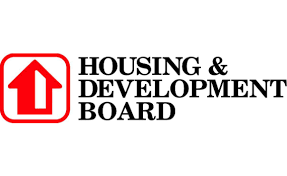
'/>

In this project, we seek to build data visualisation to shed light on the HDB resale market, and provide key consideration parameters to help us make better decisions in choosing a:

(1) HDB Resale flat, or
<br>(2) BTO flats that are likely to appreciate in the resale market


<b>Dataset Used:</b> 
<br>HDB Resale Data from January 2017 to June 2020 (Adapted from [data.gov.sg](https://data.gov.sg/dataset/resale-flat-prices))

In [ ]:
#Import csv data of Singapore HDB listings

import csv

hdb_resale_listings = []

with open('data/HDB_Resale_With_Geocoordinates.csv', newline='', encoding="utf8") as f:
    reader = csv.reader(f)
    for row in reader:
        hdb_resale_listings.append(row)

    # Remove data header
    hdb_resale_listings_headers = hdb_resale_listings[0]
    hdb_resale_listings = hdb_resale_listings[1:]
    

In [ ]:
# Visualise csv dataset using pandas

import pandas as pd

hdb_resale_df = pd.read_csv("data/HDB_Resale_With_Geocoordinates.csv")
hdb_resale_df

## 1. Data Cleaning

In [ ]:
# Clean csv dataset

for row in hdb_resale_listings:
    
    # Extract data from specific columns and store into variables for easy access
    floor_area_sqm = row[6]
    lease_remaining = row[9]                 
    resale_price = row[10]
    longitude = row[12]
    latitude = row[13]
    
    row[6] = float(floor_area_sqm)
    
    # If lease_remaining info is of string data type
    if isinstance(lease_remaining,str):
        row[9] = int(lease_remaining[:2]) # Get years of lease remaining with slicing, and convert it to int type
   
    row[10] = float(resale_price)
    
    if longitude == '':
        row[12] = 0
    else:
        row[12] = float(longitude)
        
    if latitude == '':
        row[13] = 0
    else:
        row[13] = float(latitude)

print(hdb_resale_listings[:5])

In [ ]:
# Visualise the cleaned dataset 

hdb_resale_df = pd.DataFrame(hdb_resale_listings, columns = hdb_resale_listings_headers)
hdb_resale_df.head()

## 2. Calculating the Average Resale Value in Each Town

- Calculate the average resale value of HDB resale flats for each town.
- Visualise which town has the highest resale value.

In [ ]:
#Number of resale flats in each town

resale_counts_by_town = {}  

for row in hdb_resale_listings:
    
    hdb_town = row[1]
    
    if hdb_town in resale_counts_by_town:
        
        resale_counts_by_town[hdb_town] += 1
    else:
        
        resale_counts_by_town[hdb_town] = 1

import operator

sorted_resale_counts_by_town = dict(sorted(resale_counts_by_town.items(), key=operator.itemgetter(1),reverse=True))

print(sorted_resale_counts_by_town)

In [ ]:
# Visualise the number of resale flats in each town using Matplotlib

import matplotlib.pyplot as plt

hdb_town = list(sorted_resale_counts_by_town.keys())
number_of_resale_listing = list(sorted_resale_counts_by_town.values())

fig, ax = plt.subplots()

ax.bar(hdb_town,number_of_resale_listing)

ax.set_xlabel('Town')
ax.set_ylabel('Number of Resale Flats')
ax.set_title('Counts of Resale Flats from Jan 2017 to June 2020')

ax.set_xticks(hdb_town)
ax.set_xticklabels(hdb_town,rotation=90)

plt.show()

In [ ]:
#Calculating the total sale value in each town

town_resale_value_total = {} 

for row in hdb_resale_listings:
    
    hdb_town = row[1]
    resale_price = row[10]
    
    if hdb_town in town_resale_value_total:
        
        town_resale_value_total[hdb_town] += resale_price
    else:
        
        town_resale_value_total[hdb_town] = resale_price
    
print(town_resale_value_total)

In [ ]:
#Calculate the average resale value in each town

town_resale_average = {} 

for town, value in town_resale_value_total.items():
    
    average_value = value / resale_counts_by_town[town]
    
    town_resale_average[town] = round(average_value)

import operator

town_resale_average_desc = dict(sorted(town_resale_average.items(), key=operator.itemgetter(1),reverse=True))

print(town_resale_average_desc)

In [ ]:
#Visualise the average resale value in each town

hdb_town = list(town_resale_average_desc.keys())
average_resale_value = list(town_resale_average_desc.values())

fig, ax = plt.subplots()

ax.bar(hdb_town, average_resale_value)

ax.set_xlabel('Town')
ax.set_ylabel('Average Resale Value')
ax.set_title('Average Resale Value in Each Town')

ax.set_xticks(hdb_town)
ax.set_xticklabels(hdb_town, rotation = 90)

plt.show()

HDB flats in central areas like Bukit Timah and Bishan have some of the highest resale values.
<br>As a non-mature estate, the average resale value of Punggol flats is not that far off from matured estates like Clementi, Tampines & Serangoon.

## 3. Calculating the Average Resale Value for Remaining Lease Period for HDB

- Calculate the average resale value for the different remaining lease period.
- Assess if the remaining lease period affects the resale value

In [ ]:
# Number of flat for each remaining lease period
resale_count_for_lease_year_remaining = {}

for row in hdb_resale_listings:
    
    remaining_lease = row[9]
    
    if remaining_lease in resale_count_for_lease_year_remaining:
        
        resale_count_for_lease_year_remaining[remaining_lease] += 1
        
    else:
        
        resale_count_for_lease_year_remaining[remaining_lease] = 1

sorted_resale_count_for_lease_year_remaining = dict(sorted(resale_count_for_lease_year_remaining.items()))

print(sorted_resale_count_for_lease_year_remaining)

In [ ]:
# Calculating the total resale value for each remaining lease period.
resale_value_for_lease_year_remaining = {}

for row in hdb_resale_listings:
    
    remaining_lease = row[9]
    resale_price = row[10]
    
    if remaining_lease in resale_value_for_lease_year_remaining:
        
        resale_value_for_lease_year_remaining[remaining_lease] += resale_price
        
    else:
        resale_value_for_lease_year_remaining[remaining_lease] = resale_price
        
sorted_resale_value_for_lease_year_remaining = dict(sorted(resale_value_for_lease_year_remaining.items()))

print(sorted_resale_value_for_lease_year_remaining)

In [ ]:
# Calulating the average resale value for each remaining lease period
average_resale_for_lease_year_remaining = {} 

for years, value in sorted_resale_value_for_lease_year_remaining.items():
    
    average_value = value / resale_count_for_lease_year_remaining[years]
    
    average_resale_for_lease_year_remaining[years] = round(average_value)

import operator

sorted_average_resale_for_lease_year_remaining = dict(sorted(average_resale_for_lease_year_remaining.items()))

print(sorted_average_resale_for_lease_year_remaining)

In [ ]:
#Visualise the average resale value in each each remaining lease period

lease = list(sorted_average_resale_for_lease_year_remaining.keys())
average_resale_value = list(sorted_average_resale_for_lease_year_remaining.values())

fig, ax = plt.subplots()

ax.plot(lease, average_resale_value, marker='d')

ax.set_xlabel('Lease Remaining')
ax.set_ylabel('Resale Value')
ax.set_title('Average Resale Value for Lease Years Remaining')

plt.show()


The chart illustrates that there is a close correlation between the remaining lease period and the resale value of flats sold after 2017. The shorter the remaining lease, the lower the resale value. 

Another observation from this chart is that, BTO owners who sell their flats near the Minimum Occupancy Period (MOP), with about 90 years of lease remaining, are likely to gain maximum resale value out of on their subsidised flats.

## 4. How does Floor Area Correlate with Resale Price?

- Establish the relationship between floor area and HDB resale prices.

In [ ]:
floor_area_sqm = []
resale_price = []

for row in hdb_resale_listings:
    
    floor_area_sqm.append(row[6])
    resale_price.append(row[10])

fig, ax = plt.subplots(figsize=(18,12))

ax.scatter(floor_area_sqm, resale_price)

ax.set_xlabel('Floor Area (in square meters)')
ax.set_ylabel('Sale Price (in million SGD)')


plt.show()


The scatterplot above shows that floor area is closely and positively correlated with HDB resale prices. The larger the HDB flat, the higher the resale prices

## 5. Visualise geographical distribution & resales prices of all 4-rooms HDB resale listings in Singapore using Folium Marker Cluster

In [ ]:
import folium
from folium.plugins import MarkerCluster

lat_long = []

for row in hdb_resale_listings:
    
    if row[2] == '4 ROOM':
        
        lat_long.append([row[13], row[12]])

room4_resale_price = []

for row in hdb_resale_listings:
    
    if row[2] == '4 ROOM':
        
        room4_resale_price.append(row[10])
             
map_folium = folium.Map([1.357,103.826], height=550, width=900, zoom_start=11.5)

marker_cluster = MarkerCluster().add_to(map_folium)

for i in range(0,len(lat_long)):
    
    lat_long_of_one_listing = lat_long[i]    
    pop_display_price = '$' + str(room4_resale_price[i])  
    
    folium.Marker(
        location=lat_long_of_one_listing,
        popup=pop_display_price,
        icon=None,
    ).add_to(marker_cluster)

display(map_folium)
